# Supervised Learning - Assignment

### 1. Load and understand the data

#### 1.1 Import required Python packages 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats

#### 1.2 Center justify all plots 

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

#### 1.2 Read data set and print the shape of the data

In [3]:
pdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
print("Shape of the data set is ",pdata.shape)
pdata.head()

Shape of the data set is  (5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### 1.3 List data types of all attributes

In [4]:
pdata.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

#### <font color='blue'>There are <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7 numeric variables: 'ID','Age','Experience','Income','Zip Code','CC_Avg','Mortgage' <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 categorical variables: 'Education', 'Family' <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5 Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’</font>

#### 1.4 Check for missing values

In [5]:
n_missingvalues=pdata.isnull().values.sum()
if (n_missingvalues==0):
    print ("There are no missing values in the data")

There are no missing values in the data


#### 1.5 List a 5-point summary & mean of numerical attributes

In [6]:
pdata.describe().filter(items=['ID','Age','Experience','Income','ZIP Code','CCAvg','Mortgage']).loc[['min','25%','50%','mean','75%','max']]

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
min,1.00,23.0000,-3.0000,8.0000,9307.000,0.000000,0.0000
25%,1250.75,35.0000,10.0000,39.0000,91911.000,0.700000,0.0000
50%,2500.50,45.0000,20.0000,64.0000,93437.000,1.500000,0.0000
mean,2500.50,45.3384,20.1046,73.7742,93152.503,1.937938,56.4988
75%,3750.25,55.0000,30.0000,98.0000,94608.000,2.500000,101.0000
max,5000.00,67.0000,43.0000,224.0000,96651.000,10.000000,635.0000


#### 1.6 Find correlation between attributes

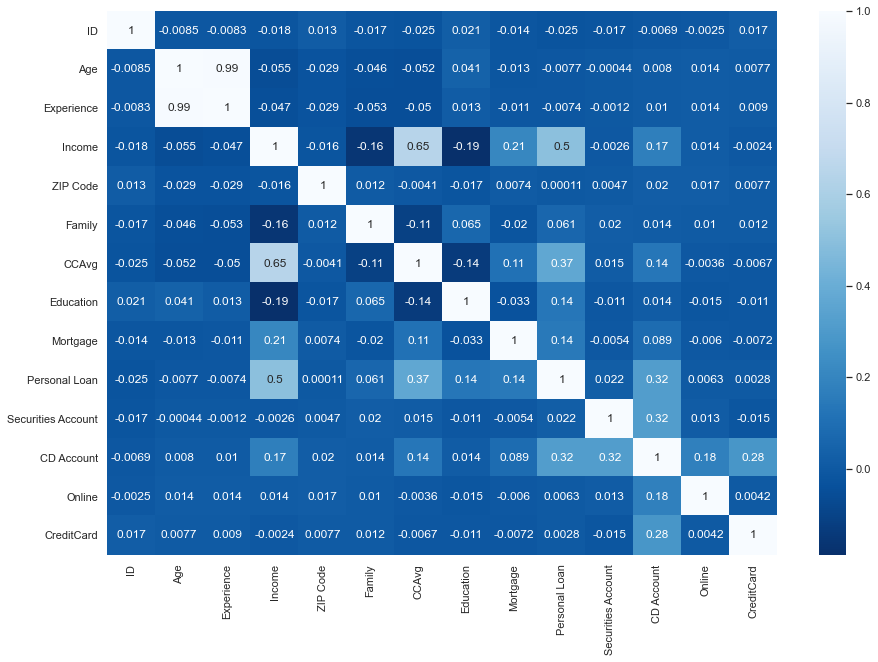

In [7]:
plt.subplots(figsize=(15,10))
sns.heatmap(pdata.corr(),cmap='Blues_r',annot=True)

#### <font color='blue'>Inferences:<br>1. Experience increases with age (very high positive correlation)<br>2. Average monthly credit card spending increases as the income increases <br>3. The dependent variable Personal Loan is positively correlated with<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Income&nbsp;&nbsp;&nbsp;&nbsp;b.Average CC spending&nbsp;&nbsp;&nbsp;&nbsp;c.The person having a CD account</font> 

### 2. Univariate Analysis

#### 2.1 Plot and analyze distribution of numberical attributes

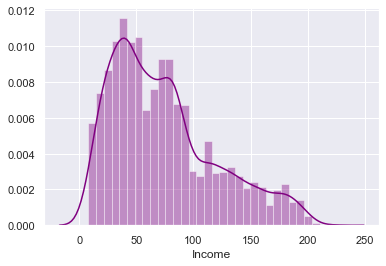

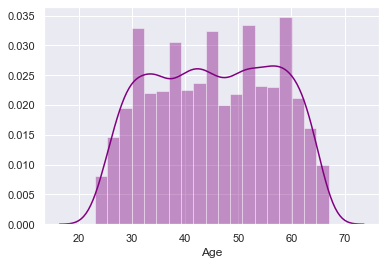

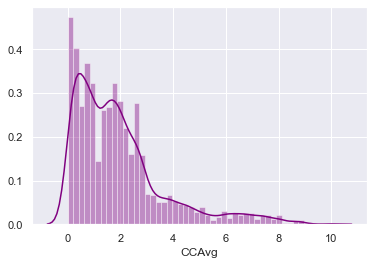

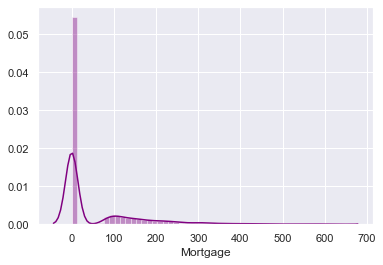

In [8]:
for i in ['Income','Age','CCAvg','Mortgage']:
    plt.figure(i)
    sns.distplot(pdata[i],color = 'purple');

#### <font color='blue'>Inferences:<br><br>&nbsp;&nbsp;&nbsp;&nbsp;1. Income and CCAvg have a highly positive skewed distribution with a right tail<br>&nbsp;&nbsp;&nbsp;&nbsp;2. Mortgage has a highly positively skewed distribution<br>&nbsp;&nbsp;&nbsp;&nbsp;3. Age,and hence, Experience follow a normal distribution with low skewness<br>&nbsp;&nbsp;&nbsp;&nbsp;4. We are not analyzing ID (as it is a running sequence) and Zip Code</font>

#### 2.2 Plot and analyze distribution of categorical variables

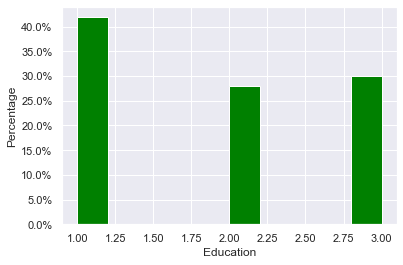

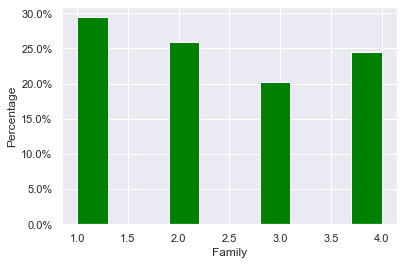

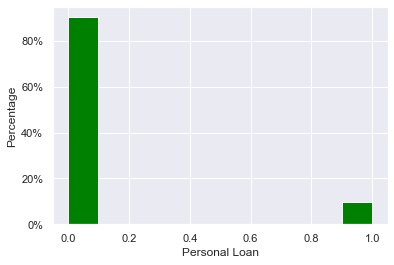

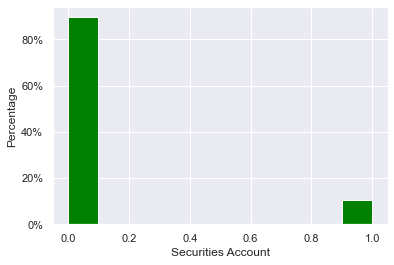

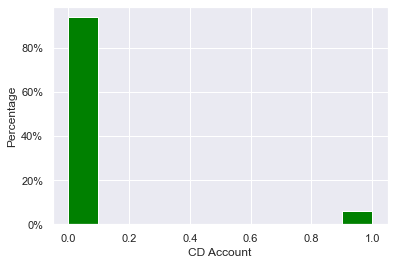

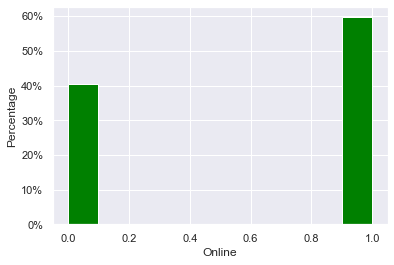

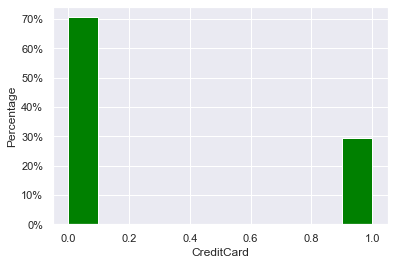

In [9]:
from matplotlib.ticker import PercentFormatter

for i in ['Education','Family','Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    plt.hist(pdata[i], weights=np.ones(len(pdata))/len(pdata),color='green');
    plt.xlabel(i)
    plt.ylabel('Percentage')

    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()

#### <font color='blue'>Inferences<br><br>&nbsp;&nbsp;&nbsp;&nbsp;1. 42% are undergraduate, 28% garduate and 30% are professional<br>&nbsp;&nbsp;&nbsp;&nbsp;2. 29% families have 1 member, 26% have 2 members, 20% have 3 members and 25% have 4 members<br>&nbsp;&nbsp;&nbsp;&nbsp;3. About 10% accepted the personal loan offered in the last campaign<br>&nbsp;&nbsp;&nbsp;&nbsp;4. Only about 10% have a securities account with the bank<br>&nbsp;&nbsp;&nbsp;&nbsp;5. Only about 6% have a CD account with the bank<br>&nbsp;&nbsp;&nbsp;&nbsp;6. About 60% customers use internet banking facilities <br>&nbsp;&nbsp;&nbsp;&nbsp;6. About 70% use a credit card issued by Thera Bank</font>

### 3. Bivariate analysis

#### 3.1 Distribution of Target variable w.r.t categorical variables

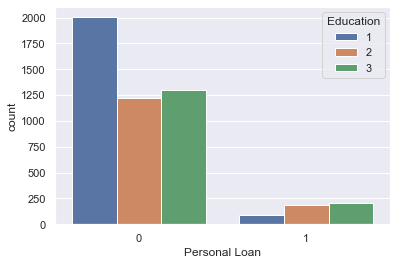

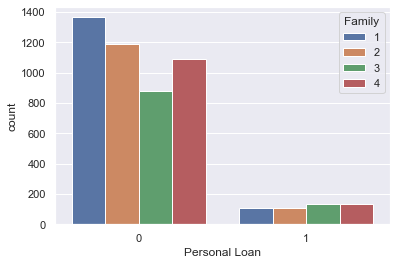

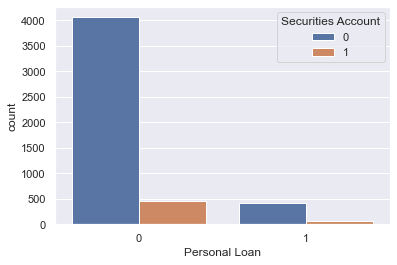

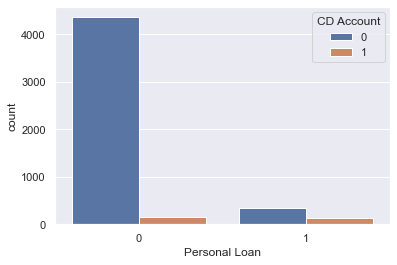

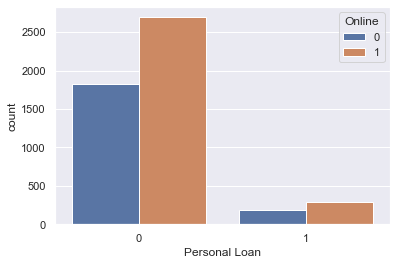

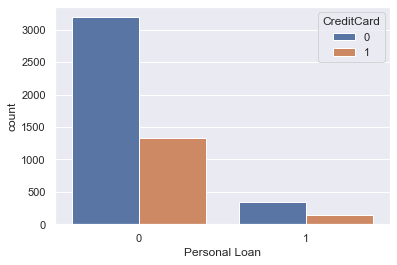

<Figure size 432x288 with 0 Axes>

In [10]:
for i in ['Education','Family','Securities Account','CD Account','Online','CreditCard']:
    sns.countplot(pdata['Personal Loan'],hue=pdata[i]);
    plt.figure();

#### <font color='blue'>Inferences<br><br>&nbsp;&nbsp;&nbsp;&nbsp;1. Customers with progressively higher levels of education are more likely to buy personal loans if offered<br>&nbsp;&nbsp;&nbsp;&nbsp;2. The number of members in the family does not influence the customers' tendency to accept the offered personal loan<br>&nbsp;&nbsp;&nbsp;&nbsp;3. Having a Securities account increases the likelihood of accepting a personal loan, but not by a significant degree<br>&nbsp;&nbsp;&nbsp;&nbsp;4. Having a CD account does not influence the customer accepting a personal loan<br>&nbsp;&nbsp;&nbsp;&nbsp;5. Customers who use online facilities are little more likely to accept a personal loan compared to those who do not. <br>&nbsp;&nbsp;&nbsp;&nbsp;6. About 60% customers use internet banking facilities <br>&nbsp;&nbsp;&nbsp;&nbsp;6. Customers using a credit card are not more likely to accept a personal loan than those who do not</font>

#### 3.2 Distribution of Target variable w.r.t numerical attributes

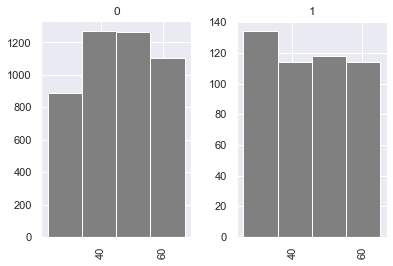

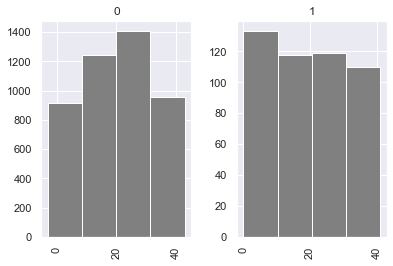

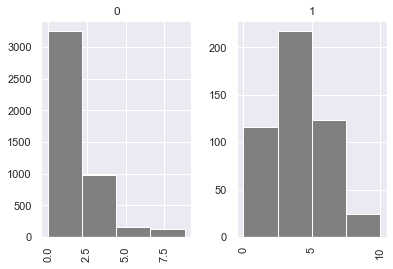

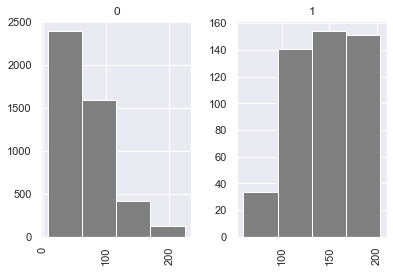

In [11]:
for i in ['Age','Experience','CCAvg','Income']:
    pdata[i].hist(bins=4,by=pdata['Personal Loan'],color='grey');

#### <font color='blue'>Inferences<br><br>&nbsp;&nbsp;&nbsp;&nbsp;1. Age of the customers does not impact their likelihood in accepting personal loans<br>&nbsp;&nbsp;&nbsp;&nbsp;2. Customers who spend 25K-50K p.m. on an average are more likely to accept a personal loan <br>&nbsp;&nbsp;&nbsp;&nbsp;3. As the income increases, customers are more likely to buy a personal loan <br>&nbsp;&nbsp;&nbsp;&nbsp;4. As Age and Experience have high +ve correlation, there is no impact on experience in customers' tendency to buy personal loans<font>

### 4 & 5. Split the data into train and test sets
We will use 70% of data for training and 30% for testing.

In [12]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore


#Separate the independent and dependent variables. Also dropping the ID and ZIP Code attributes as they do not have an impact 
X = pdata.drop(['Personal Loan','ID','ZIP Code'],axis=1)

#Convert attributes to z-Scores in order to normalize the units
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
y = pdata['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.3, random_state=10)

### 5. Model training & prediction

#### 5.1 Logistic Regression

In [13]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on training data set
lr_model = LogisticRegression(solver="liblinear")
lr_model.fit(x_train, y_train)

#predict on test data set
y_predict = lr_model.predict(x_test)

#### 6.1 Logistic Regression - Confusion Matrix

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1360
           1       0.81      0.64      0.72       140

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



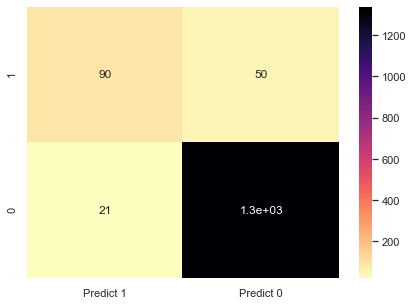

In [14]:
#Compute and print the confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,cmap='magma_r')

#Print model performance metrics 
print(metrics.classification_report(y_test, y_predict))

#### 5.2 Naive Bayes Classifier

In [15]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create and fit the model on training data set
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())
model_score = nb_model.score(x_test, y_test)

#Predict on the test data set
y_predict = nb_model.predict(x_test)

#### 6.2 Naive Bayes Classifier - Confusion Matrix

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1360
           1       0.41      0.61      0.49       140

    accuracy                           0.88      1500
   macro avg       0.68      0.76      0.71      1500
weighted avg       0.91      0.88      0.89      1500



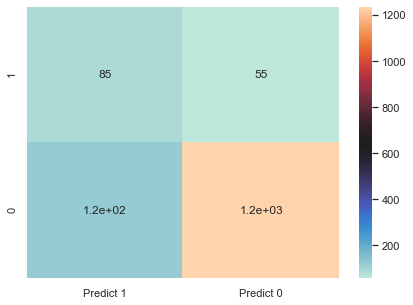

In [16]:
#Compute and print the confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,cmap='icefire')

#Print model performance metrics 
print(metrics.classification_report(y_test, y_predict))

#### 5.3 K Nearest Neighbors Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

#Create and fit the model on the training data set
knn_model = KNeighborsClassifier(n_neighbors= 4 , weights = 'distance' )
knn_model.fit(x_train, y_train)
model_score = knn_model.score(x_test, y_test)

# Predict on the test data set
y_predict = knn_model.predict(x_test)

#### In order to ensure that the optimal value for "K" is chosen, we plotted model accuracy against different values of K. The maximum accuracy is obtained for K=4. This is the rationale used for selection of K while fitting the model , as shown above.

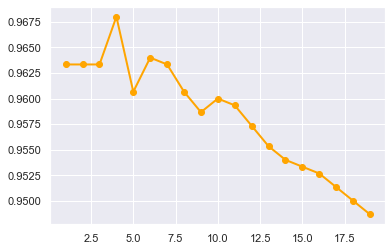

In [18]:
scores =[]
for k in range(1,20):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train)
    scores.append(NNH.score(x_test, y_test))
plt.plot(range(1,20),scores,color='orange', marker='o', linestyle='solid',linewidth=2, markersize=6);

#### 6.3 K-Nearest Neighbours - Confusion Matrix

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1360
           1       0.94      0.70      0.80       140

    accuracy                           0.97      1500
   macro avg       0.96      0.85      0.89      1500
weighted avg       0.97      0.97      0.97      1500



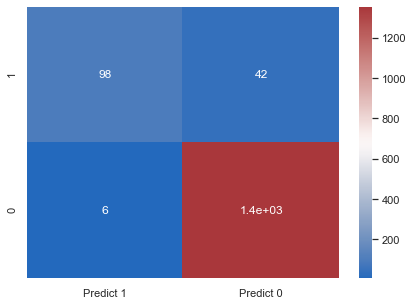

In [19]:
# Compute and print the confusion matrix 
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,cmap='vlag')

# Print the model performance metrics
print(metrics.classification_report(y_test, y_predict))

### 7. Comparison of the 3 models (LR, NB & KNN)

#### 7.1 Criterion for selecting best model<br>
<font color='blue'>The objective of Thera bank is to maximize the number of customers opting to buy a Personal Loan, through targeted marketing campaigns. Hence, it is important for the Learning exercise to 
<br>&nbsp;&nbsp;&nbsp;&nbsp;<li>Maximize # of predicted buyers vs actual buyers (True positives)</li>
<li>Minimize # of predicted non-buyers vs actual buyers (False negatives)</li>
<br>In other words, the model with the <b>least "Recall [TP/(TP+FN)]"</b> qualifies to be the best model for the given business context
    

#### 7.2 Summary of Results<br>
<table style="width:70%">
  <tr>
    <th/>  
    <th>Precision</th>
    <th>Recall</th>
    <th>F1 Score</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <th>Logistic Regression</th>
    <td>0.81</td>
      <td><b><font color='red'>0.64</font></b></td>
    <td>0.72</td>
    <td>0.95</td>
  </tr>  
  <tr>  
    <th>Naive Bayes</th>
    <td>0.41</td>
      <td><b><font color='red'>0.61</font></b></td>
    <td>0.49</td>
    <td>0.88</td>
  </tr>
  <tr>
    <th>K Nearest Neighbors</th>
    <td>0.94</td>
      <td><b><font color='red'>0.70</font></b></td>
    <td>0.80</td>
    <td>0.97</td>
</tr>
</table>
<br><font color='blue'>From the table above, it can be seen that <b><font color='red'>KNN model with K=4 proves to be the best model</font></b> for the following reasons, listed in the order of importance to the business problem 
<br>&nbsp;&nbsp;&nbsp;&nbsp;<li>It maximizes Recall - this is the primary reason as it minimizes Type II error. Additionally,</li>  
<li>It also has the highest precision i.e. it minimizes the # of predicted buyers who were actually non-buyers i.e. minimize false positives compared to true<br>&nbsp;&nbsp;&nbsp;&nbsp;positives. So, it is the model with least Type I error as well</li>
<li>Based on the above 2 points, it naturally follows that KNN has the highest F1 Score as well</li>
<li>It is also the model which has the highest accuracy among the 3 models. However we cannot say any model is best, solely on the accuracy number</li></font> 

## 8. Optional Exercise - SVM

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1360
           1       0.95      0.87      0.91       140

    accuracy                           0.98      1500
   macro avg       0.97      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



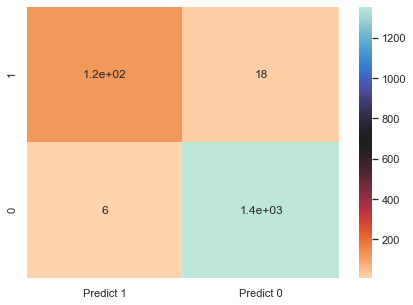

In [20]:
from sklearn import svm

#Create and fit the model on the training data set
clf = svm.SVC(gamma=0.05, C=20)
clf.fit(x_train , y_train)
y_predict = clf.predict(x_test)

# Compute and print the confusion matrix 
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,cmap='icefire_r')

# Print the model performance metrics
print(metrics.classification_report(y_test, y_predict))

#### <font color='blue'>By fitting an SVM model with gamma=0.5 and C=20 (gamma and C chosen to maximize the performance of the model) , it is observed that the precision and recall values are the highest among LR, NB, kNN and SVM. Hence it is the best of the 4 evaluated models</font> 